# Lab 1 - Overview of embeddings-based retrieval

Welcome! Here's a few notes about the Chroma course notebooks.
 - A number of warnings pop up when running the notebooks. These are normal and can be ignored.
 - Some operations such as calling an LLM or an opeation using generated data return unpredictable results and so your notebook outputs may differ from the video.
  
Enjoy the course!

### Retrieval Augmented Generation
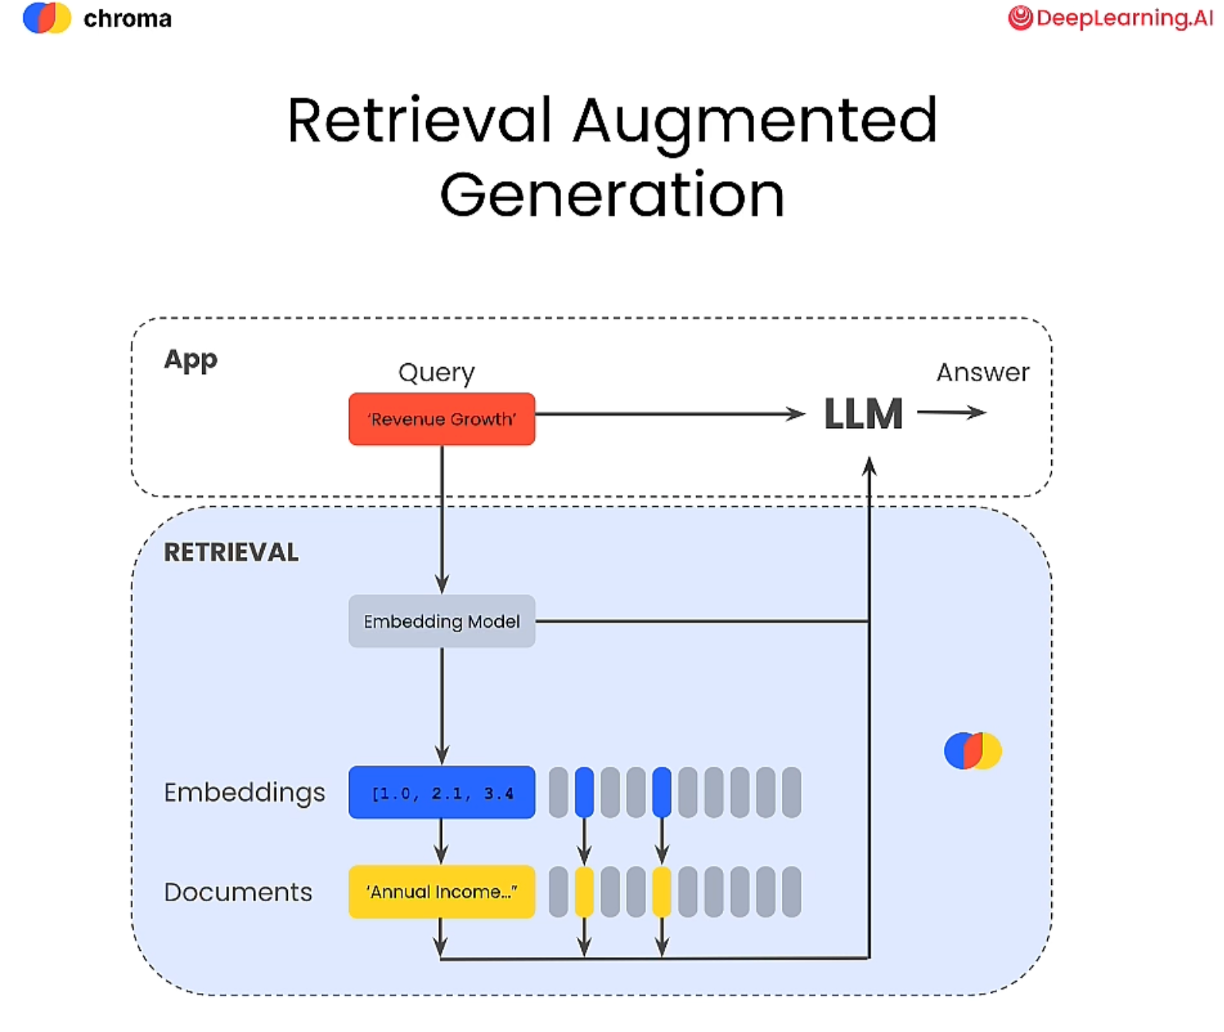

In [1]:
from pathlib import Path
import os
WD = Path.cwd()
DB = Path(WD / 'chromadb')
from src.helper_utils import word_wrap

# environmental variable to disable msg
# huggingface/tokenizers: The current process just got forked, after parallelism has 
# already been used. Disabling parallelism to avoid deadlocks...
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["ALLOW_RESET"] = "TRUE"

In [2]:
from pypdf import PdfReader

reader = PdfReader("microsoft_annual_report_2022.pdf")
pdf_texts = [p.extract_text().strip() for p in reader.pages]

# Filter the empty strings - exclude empty pages
pdf_texts = [text for text in pdf_texts if text]

# print the first page
page = 0
print(word_wrap(pdf_texts[page]))

1 Dear shareholders, colleagues, customers, and partners:  
We are
living through a period of historic economic, societal, and
geopolitical change. The world in 2022 looks nothing like 
the world in
2019. As I write this, inflation is at a 40 -year high, supply chains
are stretched, and the war in Ukraine is 
ongoing. At the same time, we
are entering a technological era with the potential to power awesome
advancements 
across every sector of our economy and society. As the
world’s largest software company, this places us at a historic

intersection of opportunity and responsibility to the world around us.
 
Our mission to empower every person and every organization on the
planet to achieve more has never been more 
urgent or more necessary.
For all the uncertainty in the world, one thing is clear: People and
organizations in every 
industry are increasingly looking to digital
technology to overcome today’s challenges and emerge stronger. And no

company is better positioned to help th

You can view the pdf in your browser [here](./microsoft_annual_report_2022.pdf) if you would like. 

In [6]:
# chunk the pdf text, first by character and then by token

from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter


In [22]:
# recursive character text splitter
# first split by "\n\n"
# if text exceeds chunk size, then split by "\n', then by ".", etc
character_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ". ", " ", ""],
    chunk_size=1000,
    chunk_overlap=0 # 
)
character_split_texts = character_splitter.split_text('\n\n'.join(pdf_texts))

chunk_num = 10
print(f"{chunk_num}th Chunk:\n", word_wrap(character_split_texts[chunk_num]))
print(f"\nTotal chunks: {len(character_split_texts)}")

10th Chunk:
 increased, due in large part to significant global datacenter
expansions and the growth in Xbox sales and usage. Despite 
these
increases, we remain dedicated to achieving a net -zero future. We
recognize that progress won’t always be linear, 
and the rate at which
we can implement emissions reductions is dependent on many factors that
can fluctuate over time.  
On the path to becoming water positive, we
invested in 21 water replenishment projects that are expected to
generate 
over 1.3  million cubic meters of volumetric benefits in nine
water basins around the world. Progress toward our zero waste

commitment included diverting more than 15,200 metric tons of solid
waste otherwise headed to landfills and incinerators, 
as well as
launching new Circular Centers to increase reuse and reduce e -waste at
our datacenters.  
We contracted to protect over 17,000 acres of land
(50% more than the land we use to operate), thus achieving our

Total chunks: 347


In [24]:
# Chunks require further splitting - split by tokens
# Note embedding model, Sentence Transformers, has a limited context window width of 256 characters
# Embedding model can truncate characters outside of context window width

chuck_overlap = 0
tokens_per_chunk = 256
token_splitter = SentenceTransformersTokenTextSplitter(chunk_overlap=chuck_overlap, 
                                                        tokens_per_chunk=tokens_per_chunk)

token_split_texts = []
for text in character_split_texts:
    token_split_texts += token_splitter.split_text(text)

chunk_num = 10
print(f"{chunk_num}th Chunk:\n", word_wrap(token_split_texts[chunk_num]))
print(f"\nTotal chunks: {len(token_split_texts)}")

10th Chunk:
 increased, due in large part to significant global datacenter
expansions and the growth in xbox sales and usage. despite these
increases, we remain dedicated to achieving a net - zero future. we
recognize that progress won ’ t always be linear, and the rate at which
we can implement emissions reductions is dependent on many factors that
can fluctuate over time. on the path to becoming water positive, we
invested in 21 water replenishment projects that are expected to
generate over 1. 3 million cubic meters of volumetric benefits in nine
water basins around the world. progress toward our zero waste
commitment included diverting more than 15, 200 metric tons of solid
waste otherwise headed to landfills and incinerators, as well as
launching new circular centers to increase reuse and reduce e - waste
at our datacenters. we contracted to protect over 17, 000 acres of land
( 50 % more than the land we use to operate ), thus achieving our

Total chunks: 349


### Sentence Transformers
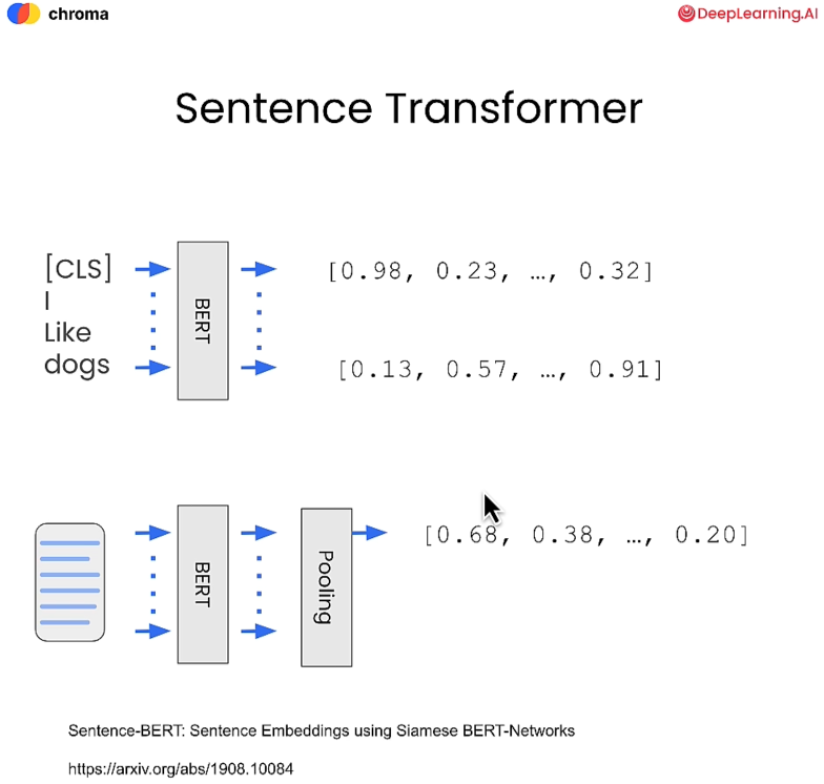

In [30]:
# Sentence Transformer Embedding Model
import chromadb
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

embedding_function = SentenceTransformerEmbeddingFunction()
print(f"10th Chunk as a dense vector:")
print(embedding_function([token_split_texts[10]])[0])
print(f"Dimensions of embedding vector: {len(embedding_function([token_split_texts[10]])[0])} ")

10th Chunk as a dense vector:
[0.042562685906887054, 0.033211808651685715, 0.030340081080794334, -0.034866608679294586, 0.0684165507555008, -0.08090909570455551, -0.015474389307200909, -0.0014509366592392325, -0.016744490712881088, 0.06770770251750946, -0.05054135248064995, -0.049195364117622375, 0.05139995366334915, 0.09192730486392975, -0.07177840173244476, 0.03951973095536232, -0.01283355988562107, -0.024947460740804672, -0.046228647232055664, -0.0243575070053339, 0.03394969925284386, 0.02550244890153408, 0.027317147701978683, -0.0041262139566242695, -0.036338355392217636, 0.0036908977199345827, -0.027430448681116104, 0.004796765279024839, -0.028896238654851913, -0.018870718777179718, 0.03666629642248154, 0.02569582872092724, 0.03131285309791565, -0.06393438577651978, 0.05394405126571655, 0.08225350826978683, -0.04175683110952377, -0.0069958120584487915, -0.02348603494465351, -0.030747948214411736, -0.0029792010318487883, -0.07790940254926682, 0.009353126399219036, 0.003162846900522

In [10]:
import chromadb
# chroma_client.reset()
# nohup chroma run --path "/Users/dovcohen/Documents/Projects/AI/Chroma" > DB.log &
chroma_client = chromadb.HttpClient(host='localhost', port=8000)


In [33]:
# delete collection if needed
# chroma_client.delete_collection(name="microsoft_annual_report_2022") 

# Create chroma collection
chroma_collection = chroma_client.create_collection("microsoft_annual_report_2022", embedding_function=embedding_function)

# assign ids to each token_split_texts
ids = [str(i) for i in range(len(token_split_texts))]

# add ids and token_split_texts to chroma collection
chroma_collection.add(ids=ids, documents=token_split_texts)
# Number of documents added to the collection:
print(f"Number of documents added to the collection: {chroma_collection.count()}")

Number of documents added to the collection: 349


### Build a RAG System



In [34]:
query = "What was the total revenue?"

# Return top 5 results
# Chroma calls embedding function
results = chroma_collection.query(query_texts=[query], n_results=5)

# return results for the 0th query
retrieved_documents = results['documents'][0]

for id, document in enumerate(retrieved_documents):
    print(id, word_wrap(document))
    print('\n')

0 revenue, classified by significant product and service offerings, was
as follows : ( in millions ) year ended june 30, 2022 2021 2020 server
products and cloud services $ 67, 321 $ 52, 589 $ 41, 379 office
products and cloud services 44, 862 39, 872 35, 316 windows 24, 761 22,
488 21, 510 gaming 16, 230 15, 370 11, 575 linkedin 13, 816 10, 289 8,
077 search and news advertising 11, 591 9, 267 8, 524 enterprise
services 7, 407 6, 943 6, 409 devices 6, 991 6, 791 6, 457 other 5, 291
4, 479 3, 768 total $ 198, 270 $ 168, 088 $ 143, 015 we have recast
certain previously reported amounts in the table above to conform to
the way we internally manage and monitor our business.


1 74 note 13 — unearned revenue unearned revenue by segment was as
follows : ( in millions ) june 30, 2022 2021 productivity and business
processes $ 24, 558 $ 22, 120 intelligent cloud 19, 371 17, 710 more
personal computing 4, 479 4, 311 total $ 48, 408 $ 44, 141 changes in
unearned revenue were as follows : ( in m

In [16]:
from openai import OpenAI
from dotenv import load_dotenv, find_dotenv
load_dotenv("/Users/dovcohen/.NL2SQL_env")
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY", None)

openai_client = OpenAI()


In [17]:
def rag(query, retrieved_documents, model="gpt-3.5-turbo"):
    # join retrieved documents with "\n\n"
    information = "\n\n".join(retrieved_documents)

    # system prompt - instructs LLM to transform from a model that remembers facts to one that 
    #                   processes information
    messages = [
        {
            "role": "system",
            "content": "You are a helpful expert financial research assistant. Your users are asking questions about information contained in an annual report."
            "You will be shown the user's question, and the relevant information from the annual report. Answer the user's question using only this information."
        },
        {"role": "user", "content": f"Question: {query}. \n Information: {information}"}
    ]
    
    response = openai_client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    return content

In [20]:
# query = "What was the total revenue?"
output = rag(query=query, retrieved_documents=retrieved_documents)

print(word_wrap(output))
# found on page 34 of 93

The total revenue for the year ended June 30, 2022, was $198,270
million.


In [42]:
query = "What was the Sales and marketing"

results = chroma_collection.query(query_texts=[query], n_results=5)

# return results for the 0th query
retrieved_documents = results['documents'][0]

output = rag(query=query, retrieved_documents=retrieved_documents)

print(word_wrap(output))

The Sales and Marketing expenses for the company in 2022 were $21,825
million, compared to $20,117 million in 2021. This represents an
increase of 8%. As a percentage of revenue, the Sales and Marketing
expenses were 11% in 2022, compared to 12% in 2021. The expenses
include payroll, employee benefits, stock-based compensation, and other
costs associated with sales and marketing personnel, as well as the
costs of advertising, promotions, trade shows, seminars, and other
programs. The increase in expenses was primarily driven by investments
in commercial sales and LinkedIn. Additionally, there was a favorable
foreign currency impact of 2% on the Sales and Marketing expenses.
